In [10]:
# Import necessary libraries
import requests
import os

# Base GitHub repository URL
BASE_URL = "https://opensourceai-book.github.io/code/datasets/"

def download_file(filename):
    """
    Download file from BASE_URL and save it locally.
    """
    url = BASE_URL + filename
    local_filename = filename
    if not os.path.exists(local_filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded {filename} successfully!")
        else:
            print(f"Failed to download {filename}. Status code: {response.status_code}")
    else:
        print(f"{filename} already exists locally.")


print(f"Okay AI multimedia fans, you are all set to code!")

Okay AI multimedia fans, you are all set to code!


Downloaded Jerry-Real-Audio.mp3 successfully!


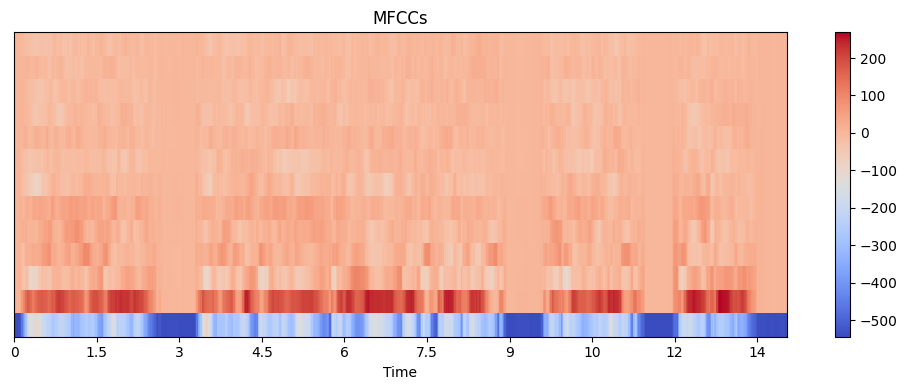

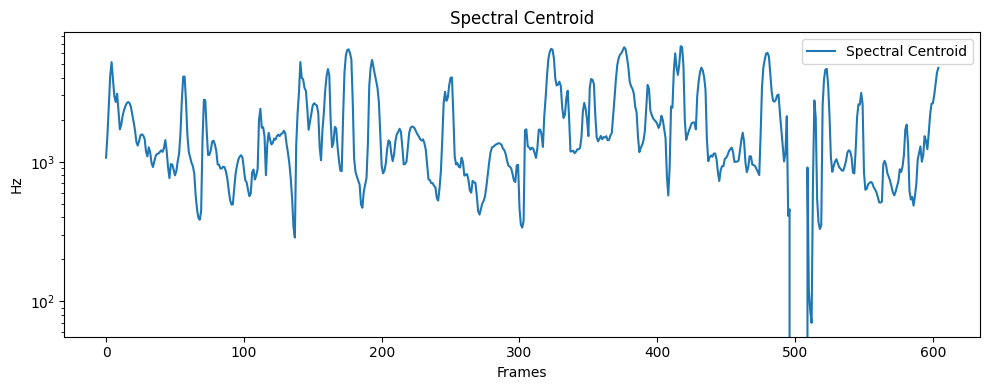

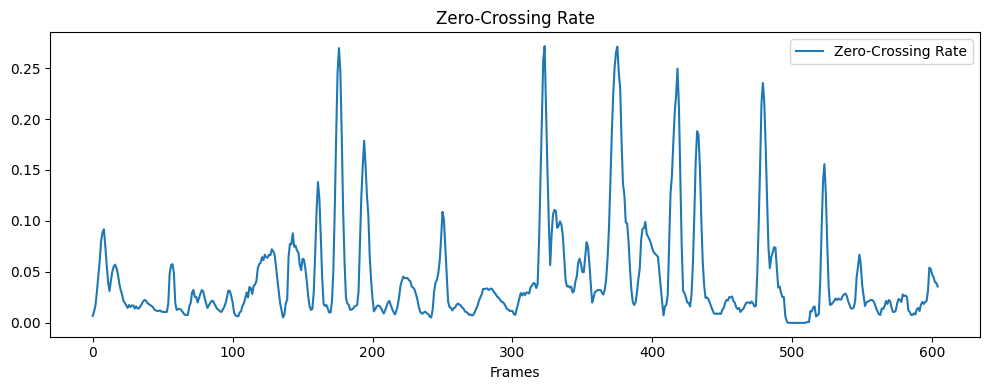

In [11]:
# Import necessary libraries for audio analysis
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def extract_basic_features(file_path):
    """
    Extract MFCCs and basic audio features using Librosa.
    """
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Extract Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # Extract Zero-Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

    return {
        "mfccs": mfccs,
        "spectral_centroid": spectral_centroid,
        "zero_crossing_rate": zero_crossing_rate
    }

def plot_features(features):
    """
    Plot the extracted features for visualization.
    """
    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(features["mfccs"], x_axis='time', sr=22050)
    plt.colorbar()
    plt.title('MFCCs')
    plt.tight_layout()
    plt.show()

    # Plot Spectral Centroid
    plt.figure(figsize=(10, 4))
    plt.semilogy(features["spectral_centroid"].T, label='Spectral Centroid')
    plt.xlabel('Frames')
    plt.ylabel('Hz')
    plt.title('Spectral Centroid')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Zero-Crossing Rate
    plt.figure(figsize=(10, 4))
    plt.plot(features["zero_crossing_rate"][0], label='Zero-Crossing Rate')
    plt.xlabel('Frames')
    plt.title('Zero-Crossing Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example Usage
audio_filename = "Jerry-Real-Audio.mp3"
download_file(audio_filename)  # Ensure the audio file is available
features = extract_basic_features(audio_filename)
plot_features(features)